In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style


### open database with GUI 

In [2]:
# open connection to database

conn = sqlite3.connect('lahman2016.sqlite') # in same folder
c = conn.cursor()

## Q1 Which player hit the most home runs in 2002?

In [13]:
# import query as panda data frame

df = pd.read_sql_query("""
SELECT nameFirst,nameLast
from
    Master
WHERE 
    playerID = (
    SELECT
    playerID
FROM
    Batting
WHERE 
    yearid=2002
ORDER BY 
    HR DESC
    LIMIT 1)""", conn)

df

,nameFirst,nameLast
0,Alex,Rodriguez


In [4]:
# with join
df = pd.read_sql_query("""
SELECT
    mas.nameFirst,
    mas.nameLast,
    bat.HR AS HomeRuns
FROM
    Batting bat
    LEFT JOIN Master mas
    ON  mas.playerID = bat.playerID
WHERE 
    yearid=2002
ORDER BY HR DESC
LIMIT 1;""", conn)

df
#--> ANSWER: Alex Rodriguez with 57 homeruns in 2002.

,nameFirst,nameLast,HomeRuns
0,Alex,Rodriguez,57


## Q2 Which team spent the most/least money on player salaries in 2002?

In [5]:
## most money
df = pd.read_sql_query("""
SELECT
    tms.name AS Team, 
    sum(sal.salary) AS TotalSalaries
FROM
    Salaries sal
    INNER JOIN Teams tms
    ON tms.teamID = sal.teamID
    AND tms.yearID = sal.yearID
WHERE 
    sal.yearid = 2002
GROUP BY
    sal.teamID
ORDER BY sum(sal.salary) DESC
LIMIT 1;
""", conn)

df
# --> ANSWER: New York Yankees with USD 125,928,583.

,Team,TotalSalaries
0,New York Yankees,125928583.0


In [6]:
## least money
df = pd.read_sql_query("""
SELECT
    tms.name AS Team,
    sum(sal.salary) AS TotalSalaries
FROM
    Salaries sal
    INNER JOIN Teams tms
    ON tms.teamID = sal.teamID
    AND tms.yearID = sal.yearID
WHERE 
    sal.yearid = 2002
GROUP BY
    sal.teamID
ORDER BY sum(sal.salary) ASC
LIMIT 1;
""", conn)

df
# --> ANSWER: Tampa Bay Devil Rays with USD 34,380,000.

,Team,TotalSalaries
0,Tampa Bay Devil Rays,34380000.0


## Q3 Which player averaged the fewest at bats between home runs in 2002?

In [7]:
df = pd.read_sql_query("""
SELECT
    mas.nameFirst,
    mas.nameLast,
    bat.HR AS HomeRuns,
    bat.AB AS AtBats,
    CAST(bat.AB AS FLOAT)/bat.HR AS Avg_AB_btw_HR
FROM
    Batting bat
    LEFT JOIN Master mas
    ON  mas.playerID = bat.playerID
WHERE 
    yearid=2002 AND
    bat.HR > 1 --between implies at least two HR
ORDER BY Avg_AB_btw_HR ASC
LIMIT 1;
""", conn)

df
# --> ANSWER: Barry Bonds with an average of 8.76 at bats between homeruns in 2002.

,nameFirst,nameLast,HomeRuns,AtBats,Avg_AB_btw_HR
0,Barry,Bonds,46,403,8.76087


## Q4 Which player in 2002 had the highest on-base percentage?

In [8]:
df = pd.read_sql_query("""
SELECT
    mas.nameFirst,
    mas.nameLast,
    bat.AB AS AtBats,
    bat.H as Hits,
    bat.BB as BasesOnBalls,
    bat.HBP AS HitByPitch,
    bat.SF AS SacrificeFlies,
    CAST(bat.H+bat.BB+bat.HBP AS FLOAT)/CAST(bat.AB+bat.BB+bat.HBP+bat.SF AS FLOAT) * 100 AS OBP_in_percent
FROM
    Batting bat
    LEFT JOIN Master mas
    ON  mas.playerID = bat.playerID
WHERE 
    yearid=2002 AND
    bat.HR > 0 -- otherwise OBP is not meaningful
ORDER BY  OBP_in_percent DESC
LIMIT 5;
""", conn)

df
# --> ANSWER: The player with the highest on-base percentage (and at least one homerun) 
#             in 2002 is Barry Bonds with an OBP of 58.17%.

,nameFirst,nameLast,AtBats,Hits,BasesOnBalls,HitByPitch,SacrificeFlies,OBP_in_percent
0,Barry,Bonds,403,149,198,9,2,58.169935
1,Mike,Kinkade,50,19,4,6,0,48.333333
2,Mark,Loretta,66,28,9,0,2,48.051948
3,Brian,Giles,497,148,135,7,5,45.031056
4,Manny,Ramirez,436,152,73,8,1,44.980695


## Q5 Which Yankees pitcher had the most wins in a season in the 00’s?

In [9]:
df = pd.read_sql_query("""
SELECT
    mas.nameFirst,
    mas.nameLast,
    tms.name AS Team,
    pit.yearID AS YearID,
    pit.W AS Wins
FROM Pitching pit
    INNER JOIN Teams tms
    ON pit.teamID = tms.teamID
    AND pit.yearID = tms.yearID
    INNER JOIN Master mas
    ON mas.playerID = pit.playerID
WHERE
    tms.teamID = "NYA" AND
    pit.yearID > 1999 AND
    pit.yearID <2010
ORDER BY pit.W DESC
LIMIT 1;
""", conn)

df
# --> ANSWER: This is Andy Pettitte who achieved 21 wins as pitcher for the Yankees in the year 2003.

,nameFirst,nameLast,Team,YearID,Wins
0,Andy,Pettitte,New York Yankees,2003,21


## Q6 In the 2000’s, did the Yankees draw more or fewer walks (Base-on-Balls or BB) as the decade went on?

In [10]:
yankee_year = c.execute("""
SELECT yearid, BB
FROM Teams
WHERE 
yearid >= 2000 
AND yearid <2010 
AND name = 'New York Yankees'
ORDER BY yearid ASC""")

yankees = c.fetchall()

In [11]:
df = pd.DataFrame(yankees, columns = ['Year', 'Walks'])
df

,Year,Walks
0,2000,631
1,2001,519
2,2002,640
3,2003,684
4,2004,670
5,2005,637
6,2006,649
7,2007,637
8,2008,535
9,2009,663


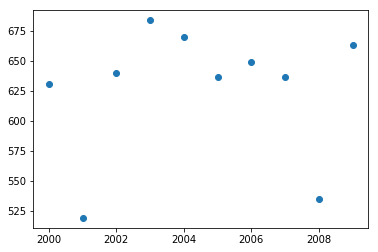

In [12]:
plt.scatter(df['Year'], df['Walks'])
None